In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, log_loss, mean_absolute_error
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from joblib import Parallel, delayed
from imblearn.under_sampling import RandomUnderSampler

In [2]:
def accuracy_n_estimator(n, X_train, y_train, X_test, y_test):
   
    # Se declara el pipeline con el preprocesamiento definido 
    rf_model = Pipeline([("preprocessor", preprocesamiento), ("model", RandomForestClassifier(n_estimators=n,random_state=42,n_jobs=-1))])
    
    # Usar validación cruzada en el conjunto de entrenamiento para obtener el accuracy
    train_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy',n_jobs=-1)
    
    # Calcular la media de los scores en el conjunto de entrenamiento
    mean_train_score = np.mean(train_scores)
    
    # Ajustar el pipeline a los datos completos de entrenamiento
    rf_model.fit(X_train, y_train)
    
    # Predecir probabilidades en el conjunto de prueba
    y_test_pred_proba = rf_model.predict(X_test)
    
    # Calcular el accuracy en el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_test_pred_proba)
    
    return mean_train_score, test_accuracy
 
def accuracy_leaf(n, X_train, y_train, X_test, y_test):
   
   # Crear el pipeline con el preprocesamiento y el modelo
   rf_model = Pipeline([("preprocessor", preprocesamiento), ("model", RandomForestClassifier(max_leaf_nodes=n,random_state=42,n_jobs=-1))])
   
   # Usar validación cruzada en el conjunto de entrenamiento para obtener el accuracy
   train_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy',n_jobs=-1)
   
   # Calcular la media de los scores en el conjunto de entrenamiento
   mean_train_score = np.mean(train_scores)
   
   # Ajustar el pipeline a los datos completos de entrenamiento
   rf_model.fit(X_train, y_train)
   
   # Predecir probabilidades en el conjunto de prueba
   y_test_pred_proba = rf_model.predict(X_test)
   y_train_pred_proba = rf_model.predict(X_train)
   
   # Calcular el accuracy en el conjunto de prueba
   test_accuracy = accuracy_score(y_test, y_test_pred_proba)
   
   return mean_train_score, test_accuracy

def accuracy_depth(n, X_train, y_train, X_test, y_test):
   
   # Crear el pipeline con el preprocesamiento y el modelo
   rf_model = Pipeline([("preprocessor", preprocesamiento), ("model", RandomForestClassifier(max_depth=n,random_state=42,n_jobs=-1))])
   
   # Usar validación cruzada en el conjunto de entrenamiento para obtener el accuracy
   train_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy',n_jobs=-1)
   
   # Calcular la media de los scores en el conjunto de entrenamiento
   mean_train_score = np.mean(train_scores)
   
   # Ajustar el pipeline a los datos completos de entrenamiento
   rf_model.fit(X_train, y_train)
   
   # Predecir probabilidades en el conjunto de prueba
   y_test_pred_proba = rf_model.predict(X_test)
   
   # Calcular el log-loss en el conjunto de prueba
   test_accuracy = accuracy_score(y_test, y_test_pred_proba)
   
   return mean_train_score, test_accuracy

def loss_depth(n, X_train, y_train, X_test, y_test):
   
    # Crear el pipeline con el preprocesamiento y el modelo
    rf_model = Pipeline([
        ("preprocessor", preprocesamiento),  # Preprocesamiento
        ("model", RandomForestClassifier(max_depth=n, random_state=42, n_jobs=-1))
    ])
    
    # Entrenar el pipeline
    rf_model.fit(X_train, y_train)
    
    # Predecir las probabilidades para el conjunto de entrenamiento y prueba
    y_train_pred_proba = rf_model.predict_proba(X_train)
    y_test_pred_proba = rf_model.predict_proba(X_test)
    
    # Calcular log-loss para el conjunto de entrenamiento y prueba
    train_loss = log_loss(y_train, y_train_pred_proba)
    test_loss = log_loss(y_test, y_test_pred_proba)
    
    return train_loss, test_loss
 
def loss_n_estimators(n, X_train, y_train, X_test, y_test):
   
    # Crear el pipeline con el preprocesamiento y el modelo
    rf_model = Pipeline([
        ("preprocessor", preprocesamiento),  
        ("model", RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1))
    ])
    
    # Entrenar el pipeline
    rf_model.fit(X_train, y_train)
    
    # Predecir las probabilidades para el conjunto de entrenamiento y prueba
    y_train_pred_proba = rf_model.predict_proba(X_train)
    y_test_pred_proba = rf_model.predict_proba(X_test)
    
    # Calcular log-loss para el conjunto de entrenamiento y prueba
    train_loss = log_loss(y_train, y_train_pred_proba)
    test_loss = log_loss(y_test, y_test_pred_proba)
    
    return train_loss, test_loss
 
def loss_max_leaf_nodes(n, X_train, y_train, X_test, y_test):
    # Crear el pipeline con el preprocesamiento y el modelo
    rf_model = Pipeline([
        ("preprocessor", preprocesamiento),  # Preprocesamiento
        ("model", RandomForestClassifier(max_leaf_nodes=n, random_state=42, n_jobs=-1))
    ])
    
    # Entrenar el pipeline
    rf_model.fit(X_train, y_train)
    
    # Predecir las probabilidades para el conjunto de entrenamiento y prueba
    y_train_pred_proba = rf_model.predict_proba(X_train)
    y_test_pred_proba = rf_model.predict_proba(X_test)
    
    # Calcular log-loss para el conjunto de entrenamiento y prueba
    train_loss = log_loss(y_train, y_train_pred_proba)
    test_loss = log_loss(y_test, y_test_pred_proba)
    
    return train_loss, test_loss

def bias_variance_depth(n, X_train, y_train, X_test, y_test):
   
   # Creación del pipeline con el preprocesamiento y el modelo escogido
   rf_model = Pipeline([("preprocessor", preprocesamiento), ("model", RandomForestClassifier(max_depth=n,random_state=42,n_jobs=-1))])

   # Ajustar el pipeline a los datos completos de entrenamiento
   rf_model.fit(X_train, y_train)
   
   # Hacer predicciones en el conjunto de entrenamiento y prueba
   y_pred_test = rf_model.predict(X_test)
   y_pred_train = rf_model.predict(X_train)
   
   # Calcular el error promedio absoluto en el conjunto de entrenamiento, prueba y calcular el MSE
   variance = mean_absolute_error(y_test, y_pred_test)
   bias_sqrd = (mean_absolute_error(y_train,y_pred_train))**2
   MSE = variance + bias_sqrd
   return variance,bias_sqrd, MSE

def bias_variance_n_estimator(n, X_train, y_train, X_test, y_test):
   
   # Creación del pipeline con el preprocesamiento y el modelo escogido
   rf_model = Pipeline([("preprocessor", preprocesamiento), ("model", RandomForestClassifier(n_estimators=n,random_state=42,n_jobs=-1))])

   # Ajustar el pipeline a los datos completos de entrenamiento
   rf_model.fit(X_train, y_train)
   
   # Hacer predicciones en el conjunto de entrenamiento y prueba
   y_pred_test = rf_model.predict(X_test)
   y_pred_train = rf_model.predict(X_train)
   
   # Calcular el error promedio absoluto en el conjunto de entrenamiento, prueba y calcular el MSE
   variance = mean_absolute_error(y_test, y_pred_test)
   bias_sqrd = (mean_absolute_error(y_train,y_pred_train))**2
   MSE = variance + bias_sqrd
   
   return variance,bias_sqrd, MSE

def bias_variance_leaf(n, X_train, y_train, X_test, y_test):
   
   # Creación del pipeline con el preprocesamiento y el modelo escogido
   rf_model = Pipeline([("preprocessor", preprocesamiento), ("model", RandomForestClassifier(max_leaf_nodes=n,random_state=42,n_jobs=-1))])

   # Ajustar el pipeline a los datos completos de entrenamiento
   rf_model.fit(X_train, y_train)
   
   # Hacer predicciones en el conjunto de entrenamiento y prueba
   y_pred_test = rf_model.predict(X_test)
   y_pred_train = rf_model.predict(X_train)
   
   # Calcular el error promedio absoluto en el conjunto de entrenamiento, prueba y calcular el MSE
   variance = mean_absolute_error(y_test, y_pred_test)
   bias_sqrd = (mean_absolute_error(y_train,y_pred_train))**2
   MSE = variance + bias_sqrd
   
   return variance,bias_sqrd, MSE

In [3]:
# Importación del dataset y analisis exploratorio del dataset
df = pd.read_csv("bank-additional-full.csv", sep=';')
print(df.y.value_counts())
#Data set extraido de Moro, S., Rita, P., & Cortez, P. (2014). Bank Marketing [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

y
no     36548
yes     4640
Name: count, dtype: int64


In [4]:
# Transformamos el label ya que es una variable categorica que está en un string , seleccionamos los features y balanceamos el dataset con Random Under Sampler
dfy = df["y"].map({"no":0, "yes":1})
dfx = df.drop("y", axis=1)
rus = RandomUnderSampler(random_state=0)
dfx, dfy = rus.fit_resample(dfx,dfy)

In [5]:
# Seleccionamos los features que son numericos y categoricos para preprocesarlos con columntranformer de tal manera que no haga nada a las
# variables numericas y que transforme las variables categoricas utilizando OneHotEncoder


caracteristicas_numericas = ["age", "campaign","duration", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx","euribor3m", "nr.employed"]

caracteristicas_categoricas = ["job", "marital", "education","default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

preprocesamiento = ColumnTransformer([("numericos", "passthrough", caracteristicas_numericas), ("categoricas", OneHotEncoder( handle_unknown="ignore"),caracteristicas_categoricas)])


In [6]:
# Dividir el dataset en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3, random_state=42)


## Calcular la perdida del modelo variando hiperparametros

In [7]:
# Rango en el que se va a variar el hiperparametro
n_estimators_range = np.arange(1,202,2)

train_loss_n_estimators = []
test_loss_n_estimators = []

# Usar joblib.Parallel para paralelizar la ejecución del bucle
results = Parallel(n_jobs=-1)(delayed(loss_n_estimators)(n, X_train, y_train, X_test, y_test) for n in n_estimators_range)

# Desempaquetar los resultados
train_loss_n_estimators, test_loss_n_estimators = zip(*results)

# Convertir los resultados a listas para usarlos posteriormente
train_loss_n_estimators = list(train_loss_n_estimators)
test_loss_n_estimators = list(test_loss_n_estimators)


In [ ]:

# Rango en el que se va a variar el hiperparametro
max_depth_range = np.arange(1,41,1)

train_loss_depth = []
test_loss_depth = []

# Usar joblib.Parallel para paralelizar la ejecución del bucle
results = Parallel(n_jobs=-1)(delayed(loss_depth)(n, X_train, y_train, X_test, y_test) for n in max_depth_range)

# Desempaquetar los resultados
train_loss_depth, test_loss_depth = zip(*results)

# Convertir los resultados a listas para usarlos posteriormente
train_loss_depth = list(train_loss_depth)
test_loss_depth = list(test_loss_depth)

In [9]:
# Rango en el que se va a variar el hiperparametro
max_leaf_nodes_range = np.arange(2,102,1)

train_loss_leaf = []
test_loss_leaf = []

# Usar joblib.Parallel para paralelizar la ejecución del bucle
results = Parallel(n_jobs=-1)(delayed(loss_max_leaf_nodes)(n, X_train, y_train, X_test, y_test) for n in max_leaf_nodes_range)

# Desempaquetar los resultados
train_loss_leaf, test_loss_leaf = zip(*results)

# Convertir los resultados a listas para usarlos posteriormente
train_loss_leaf = list(train_loss_leaf)
test_loss_leaf = list(test_loss_leaf)

## Graficar la perdida del modelo al variar hiperparametros

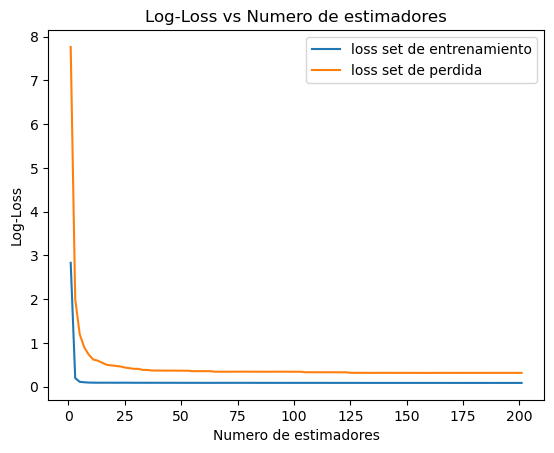

In [10]:
plt.figure()
plt.plot(n_estimators_range, train_loss_n_estimators, label='loss set de entrenamiento')
plt.plot(n_estimators_range, test_loss_n_estimators, label='loss set de perdida')

# Añadir etiquetas y título
plt.xlabel('Numero de estimadores')
plt.ylabel('Log-Loss')
plt.title('Log-Loss vs Numero de estimadores')
plt.legend()

# Mostrar la gráfica
plt.show()

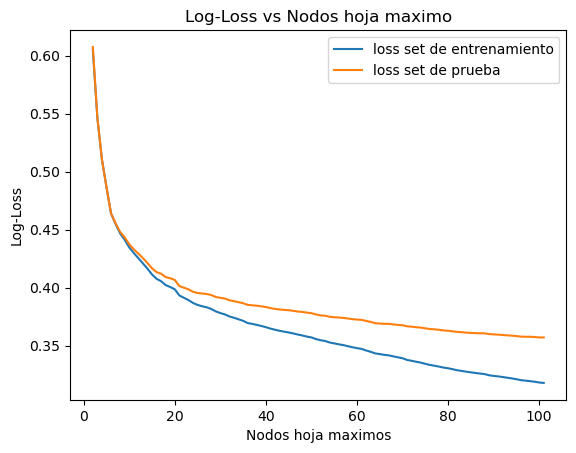

In [11]:
plt.figure()
plt.plot(max_leaf_nodes_range, train_loss_leaf, label='loss set de entrenamiento')
plt.plot(max_leaf_nodes_range, test_loss_leaf, label='loss set de prueba')

# Añadir etiquetas y título
plt.xlabel('Nodos hoja maximos')
plt.ylabel('Log-Loss')
plt.title('Log-Loss vs Nodos hoja maximo')
plt.legend()

# Mostrar la gráfica
plt.show()

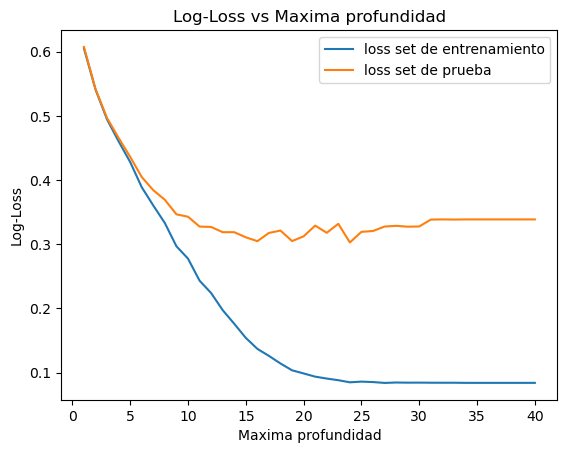

In [12]:
plt.figure()
plt.plot(max_depth_range, train_loss_depth, label='loss set de entrenamiento')
plt.plot(max_depth_range, test_loss_depth, label='loss set de prueba')

# Añadir etiquetas y título
plt.xlabel('Maxima profundidad')
plt.ylabel('Log-Loss')
plt.title('Log-Loss vs Maxima profundidad')
plt.legend()

# Mostrar la gráfica
plt.show()

## Calcular la precisión del modelo al variar hiperparametros

In [13]:
# Inicializar listas para almacenar las precisiones
var_train_n_estimators = []
var_test_n_estimators = []

results = Parallel(n_jobs=-1)(delayed(accuracy_n_estimator)(n, X_train, y_train, X_test, y_test) for n in n_estimators_range)

# Desempaquetar los resultados
var_train_n_estimators, var_test_n_estimators = zip(*results)

# Convertir los resultados a listas para usarlos posteriormente
var_train_n_estimators = list(var_train_n_estimators)
var_test_n_estimators = list(var_test_n_estimators)

In [14]:
# Inicializar listas para almacenar las precisiones
var_train_leaf = []
var_test_leaf = []

results = Parallel(n_jobs=-1)(delayed(accuracy_leaf)(n, X_train, y_train, X_test, y_test) for n in max_leaf_nodes_range)

# Desempaquetar los resultados
var_train_leaf, var_test_leaf = zip(*results)

# Convertir los resultados a listas para usarlos posteriormente
var_train_leaf = list(var_train_leaf)
var_test_leaf = list(var_test_leaf)

In [15]:
# Inicializar listas para almacenar las precisiones
var_train_depth = []
var_test_depth = []

results = Parallel(n_jobs=-1)(delayed(accuracy_depth)(n, X_train, y_train, X_test, y_test) for n in max_depth_range)

# Desempaquetar los resultados
var_train_depth, var_test_depth = zip(*results)

# Convertir los resultados a listas para usarlos posteriormente
var_train_depth = list(var_train_depth)
var_test_depth = list(var_test_depth)

## Graficar la precisión del modelo al variar distintos hiperparametros

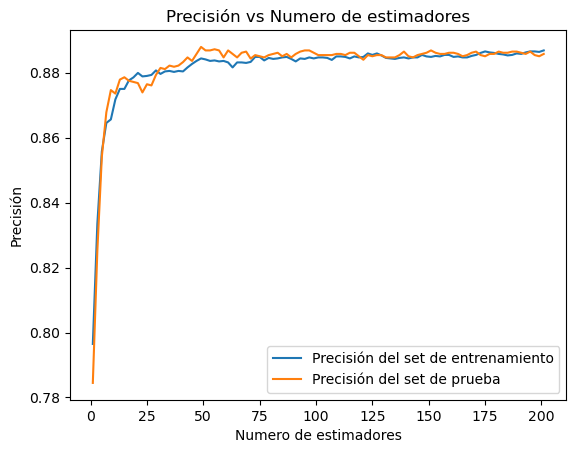

In [16]:
plt.figure()
plt.plot(n_estimators_range, var_train_n_estimators, label='Precisión del set de entrenamiento')
plt.plot(n_estimators_range, var_test_n_estimators, label='Precisión del set de prueba')

plt.xlabel('Numero de estimadores')
plt.ylabel('Precisión')
plt.title('Precisión vs Numero de estimadores')
plt.legend()
plt.show()

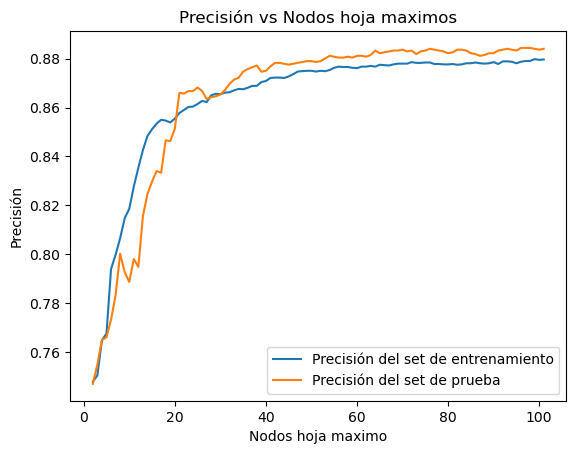

In [17]:
plt.figure()
plt.plot(max_leaf_nodes_range, var_train_leaf, label='Precisión del set de entrenamiento')
plt.plot(max_leaf_nodes_range, var_test_leaf, label='Precisión del set de prueba')

plt.xlabel('Nodos hoja maximo')
plt.ylabel('Precisión')
plt.title('Precisión vs Nodos hoja maximos')
plt.legend()
plt.show()

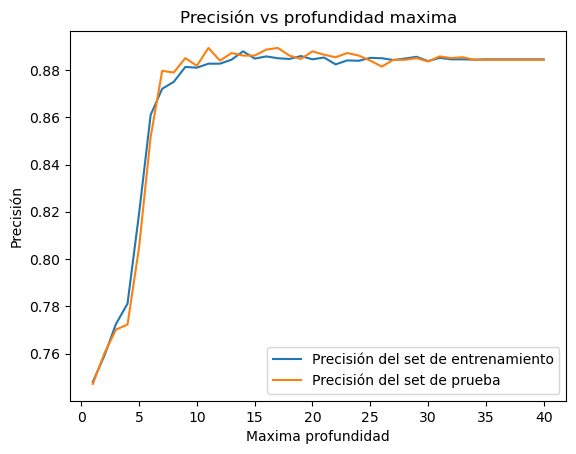

In [18]:
plt.figure()
plt.plot(max_depth_range, var_train_depth, label='Precisión del set de entrenamiento')
plt.plot(max_depth_range, var_test_depth, label='Precisión del set de prueba')

plt.xlabel('Maxima profundidad')
plt.ylabel('Precisión')
plt.title('Precisión vs profundidad maxima')
plt.legend()
plt.show()

## Calcular sesgo, varianza y MSE del modelo al variar los hiperparametros

In [19]:
# Inicializar listas para almacenar las varianzas, sesgos y MSE
bias_leaf = []
variance_leaf = []
MSE_leaf = []
results = Parallel(n_jobs=-1)(delayed(bias_variance_leaf)(n, X_train, y_train, X_test, y_test) for n in max_leaf_nodes_range)

# Desempaquetar los resultados
variance_leaf, bias_leaf, MSE_leaf = zip(*results)

# Convertir los resultados a listas para usarlos posteriormente
bias_leaf = list(bias_leaf)
variance_leaf = list(variance_leaf)
MSE_leaf = list(MSE_leaf)

In [20]:
# Inicializar listas para almacenar las varianzas, sesgos y MSE
bias_depth = []
variance_depth = []
MSE_depth = []

results = Parallel(n_jobs=-1)(delayed(bias_variance_depth)(n, X_train, y_train, X_test, y_test) for n in max_depth_range)

# Desempaquetar los resultados
variance_depth, bias_depth, MSE_depth = zip(*results)

# Convertir los resultados a listas para usarlos posteriormente
bias_depth = list(bias_depth)
variance_depth = list(variance_depth)
MSE_depth = list(MSE_depth)

In [21]:
# Inicializar listas para almacenar las varianzas, sesgos y MSE
bias_n_estimators = []
variance_n_estimators = []
MSE_n_estimators = []
results = Parallel(n_jobs=-1)(delayed(bias_variance_n_estimator)(n, X_train, y_train, X_test, y_test) for n in n_estimators_range)

# Desempaquetar los resultados
variance_n_estimators, bias_n_estimators, MSE_n_estimators = zip(*results)

# Convertir los resultados a listas para usarlos posteriormente
bias_n_estimators = list(bias_n_estimators)
variance_n_estimators = list(variance_n_estimators)
MSE_n_estimators = list(MSE_n_estimators)

## Graficar el sesgo, vaianza y MSE al variar hiperparametros

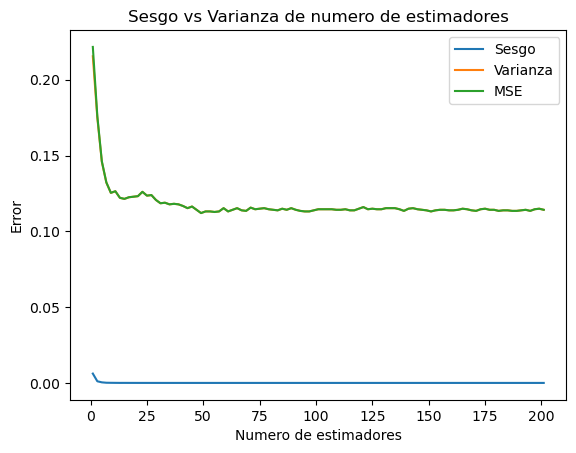

In [22]:
plt.figure()
plt.plot(n_estimators_range, bias_n_estimators, label='Sesgo')
plt.plot(n_estimators_range, variance_n_estimators, label='Varianza')
plt.plot(n_estimators_range, MSE_n_estimators, label='MSE')

plt.xlabel('Numero de estimadores')
plt.ylabel('Error')
plt.title('Sesgo vs Varianza de numero de estimadores')
plt.legend()
plt.show()

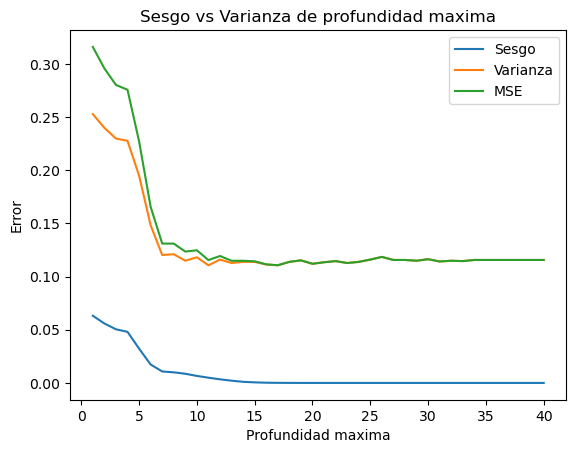

In [23]:
plt.figure()
plt.plot(max_depth_range, bias_depth, label='Sesgo')
plt.plot(max_depth_range, variance_depth, label='Varianza')
plt.plot(max_depth_range, MSE_depth, label='MSE')

plt.xlabel('Profundidad maxima')
plt.ylabel('Error')
plt.title('Sesgo vs Varianza de profundidad maxima')
plt.legend()
plt.show()

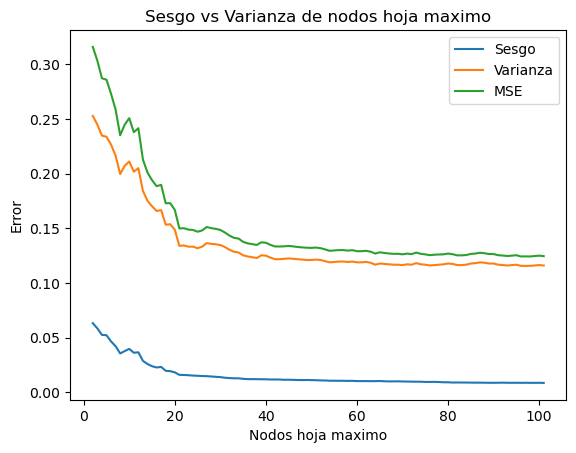

In [24]:
plt.figure()
plt.plot(max_leaf_nodes_range, bias_leaf, label='Sesgo')
plt.plot(max_leaf_nodes_range, variance_leaf, label='Varianza')
plt.plot(max_leaf_nodes_range, MSE_leaf, label='MSE')

plt.xlabel('Nodos hoja maximo')
plt.ylabel('Error')
plt.title('Sesgo vs Varianza de nodos hoja maximo')
plt.legend()
plt.show()

# Calculo de precisión del set de prueba y entrenamiento de un modelo de Random Forest con hiperparametros arbitrarios

In [25]:
rf_model = Pipeline([("preprocessor", preprocesamiento), ("model", RandomForestClassifier())])
rf_model.set_params(**{"model__max_depth":2, "model__n_estimators":15, "model__max_leaf_nodes":2})
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_tr = rf_model.predict(X_train)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_pred_tr))

0.71875
0.718134236453202


# Despliegue de matriz de confusión

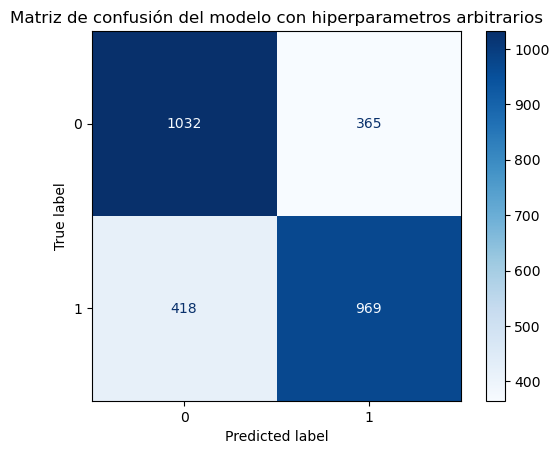

In [26]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión del modelo con hiperparametros arbitrarios')
plt.show()

# Se utiliza gridsearch para encontrar los mejores hiperparametros para el modelo con cross-validation y evaluando para accuracy

In [27]:
rf_model = Pipeline([("preprocessor", preprocesamiento), ("model", RandomForestClassifier())])
gs = GridSearchCV(rf_model, {"model__max_depth": [10, 18], "model__n_estimators": [100, 150], "model__max_leaf_nodes": [35, 45]}, 
                  n_jobs=-1, cv=5, scoring='accuracy')

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numericos',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'campaign',
                                                                          'duration',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m',
                                                                          'nr.employed']),
                                                                        ('categoricas',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week',
                                                                          'poutcome'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 18],
                         'model__max_leaf_nodes': [35, 45],
                         'model__n_estimators': [100, 150]},
             scoring='accuracy')

# Se seleccionan los mejores parametros y se muestra un resumen en un dataframe del proceso de grid search con sus puntajes

In [28]:
print(gs.best_params_)
print(gs.best_score_)
resultados = pd.DataFrame.from_dict(gs.cv_results_)
resultados

{'model__max_depth': 10, 'model__max_leaf_nodes': 45, 'model__n_estimators': 150}
0.8726894060519929


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_leaf_nodes,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.924370,0.053270,0.053727,0.007526,10,35,100,"{'model__max_depth': 10, 'model__max_leaf_node...",0.876154,0.862972,0.866821,0.861432,0.857583,0.864992,0.006318,6
1,1.494301,0.142834,0.084319,0.027902,10,35,150,"{'model__max_depth': 10, 'model__max_leaf_node...",0.874615,0.844496,0.866821,0.860662,0.866821,0.862683,0.010114,8
2,1.141504,0.069652,0.072194,0.026793,10,45,100,"{'model__max_depth': 10, 'model__max_leaf_node...",0.879231,0.863741,0.868360,0.859122,0.880677,0.870226,0.008475,4
3,1.735603,0.188596,0.079250,0.018126,10,45,150,"{'model__max_depth': 10, 'model__max_leaf_node...",0.882308,0.871440,0.861432,0.869130,0.879138,0.872689,0.007417,1
4,1.216675,0.163143,0.054627,0.015418,18,35,100,"{'model__max_depth': 18, 'model__max_leaf_node...",0.881538,0.864511,0.869900,0.860662,0.860662,0.867455,0.007814,5
5,1.542544,0.115122,0.068425,0.013570,18,35,150,"{'model__max_depth': 18, 'model__max_leaf_node...",0.870769,0.852194,0.860662,0.867590,0.862202,0.862683,0.006384,7
6,0.951392,0.117047,0.053571,0.014499,18,45,100,"{'model__max_depth': 18, 'model__max_leaf_node...",0.885385,0.869900,0.863741,0.865281,0.869130,0.870687,0.007701,3
7,1.307258,0.043157,0.048281,0.012941,18,45,150,"{'model__max_depth': 18, 'model__max_leaf_node...",0.876923,0.869130,0.871440,0.864511,0.879908,0.872382,0.005489,2


# Calculo de precisión del modelo con los parametros optimizados

In [29]:
rf_model.set_params(**gs.best_params_)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_tr = rf_model.predict(X_train)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_pred_tr))

0.8764367816091954
0.8885467980295566


# Despliegue de matriz de confusión

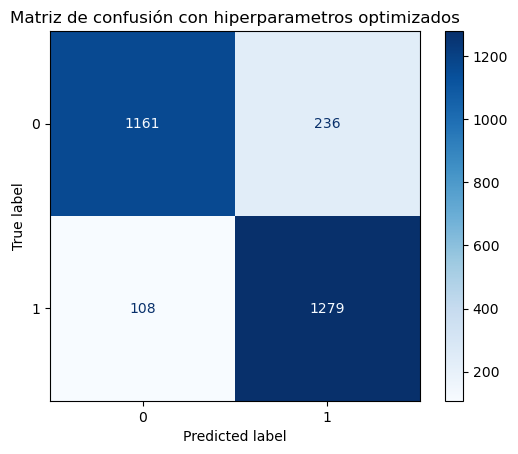

In [30]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión con hiperparametros optimizados')
plt.show()